# Basics of implementing quantitative trading strategy

*This notebook will walk you through the steps involved in the process of finalizing a trading strategy for a stock or portfolio. We'll learn the basics of backtesting the strategy we implemented using statistical measures.*

The OLT covers the following topics:

* Getting started guide
    * Data Collection
    * Time series analysis
    * Exploratory data analysis
    * Visualizations
* Financial Analyses
    * Calculating returns
    * Moving averages
    * Volatility calculation
* Implementing Momentum Trading strategy with Python
* Backtesting the strategy
* Evaluating the strategy
    * Sharpe ratio
    * Max Drawdown
    * Compound Annual Growth Rate


# Data reading and cleansing

In this section, we are going to read the data we extracted from the APIs. We'll explore the data and find the caveats with the format of the data. We'll then make the necessary format changes to the data to make it easy to use while implementing the strategy.

In [1]:
# importing the required library for reading the file
import ast
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
aapl = pd.read_csv('../data/apple_stock_eod_prices.csv', index_col=0, header=0, parse_dates=True)
aapl.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
Date,,,,,,,,,,,,
2010-01-04,213.43,214.50,212.38,214.01,17633200.0,0.0,1.0,26.926265,27.061256,26.793797,26.999437,123432400.0
2010-01-05,214.60,215.59,213.25,214.38,21496600.0,0.0,1.0,27.073872,27.198770,26.903556,27.046116,150476200.0
2010-01-06,214.38,215.23,210.75,210.97,19720000.0,0.0,1.0,27.046116,27.153352,26.588157,26.615912,138040000.0
2010-01-07,211.75,212.00,209.05,210.58,17040400.0,0.0,1.0,26.714316,26.745856,26.373685,26.566710,119282800.0
2010-01-08,210.30,212.00,209.06,211.98,15986100.0,0.0,1.0,26.531385,26.745856,26.374947,26.743333,111902700.0


# Manipulating Time Series Data

In [3]:
# inspect the index column
aapl.index

DatetimeIndex(['2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
               '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13',
               '2010-01-14', '2010-01-15',
               ...
               '2018-11-16', '2018-11-19', '2018-11-20', '2018-11-21',
               '2018-11-23', '2018-11-26', '2018-11-27', '2018-11-28',
               '2018-11-29', '2018-11-30'],
              dtype='datetime64[ns]', name='Date', length=2245, freq=None)

In [4]:
# inspect the columns
aapl.columns


Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Dividend', 'Split',
       'Adj_Open', 'Adj_High', 'Adj_Low', 'Adj_Close', 'Adj_Volume'],
      dtype='object')

In [5]:
# selecting the top and bottom rows
subset = aapl['Close'][-10:]

# checking the type of the subset rows
subset

Date
2018-11-16    193.53
2018-11-19    185.86
2018-11-20    176.98
2018-11-21    176.78
2018-11-23    172.29
2018-11-26    174.62
2018-11-27    174.24
2018-11-28    180.94
2018-11-29    179.55
2018-11-30    178.58
Name: Close, dtype: float64

In [6]:
# explore monthly or weekly data for the stock
print((aapl.loc[pd.Timestamp('2010-11-01'):pd.Timestamp('2010-12-31')].head()))

              Open    High     Low   Close      Volume  Dividend  Split  \
Date                                                                      
2010-11-01  302.22  305.60  302.20  304.18  15138900.0       0.0    1.0   
2010-11-02  307.00  310.19  307.00  309.36  15497500.0       0.0    1.0   
2010-11-03  311.37  312.88  308.53  312.80  18155300.0       0.0    1.0   
2010-11-04  315.45  320.18  315.03  318.27  22946000.0       0.0    1.0   
2010-11-05  317.99  319.57  316.75  317.13  12901900.0       0.0    1.0   

             Adj_Open   Adj_High    Adj_Low  Adj_Close   Adj_Volume  
Date                                                                 
2010-11-01  38.127985  38.554404  38.125461  38.375258  105972300.0  
2010-11-02  38.731028  39.133477  38.731028  39.028765  108482500.0  
2010-11-03  39.282346  39.472847  38.924052  39.462754  127087100.0  
2010-11-04  39.797077  40.393813  39.744090  40.152848  160622000.0  
2010-11-05  40.117523  40.316855  39.961085  40.009026

In [7]:
# Inspect the first rows of 2011 
print(aapl.loc['2011'].head())

                Open    High       Low   Close      Volume  Dividend  Split  \
Date                                                                          
2011-01-03  325.6400  330.26  324.8365  329.57  15897800.0       0.0    1.0   
2011-01-04  332.4400  332.50  328.1500  331.29  11038600.0       0.0    1.0   
2011-01-05  329.5500  334.34  329.5000  334.00   9125700.0       0.0    1.0   
2011-01-06  334.7194  335.25  332.9000  333.73  10729600.0       0.0    1.0   
2011-01-07  333.9900  336.35  331.9000  336.12  11140400.0       0.0    1.0   

             Adj_Open   Adj_High    Adj_Low  Adj_Close   Adj_Volume  
Date                                                                 
2011-01-03  41.082645  41.665503  40.981275  41.578452  111284600.0  
2011-01-04  41.940531  41.948100  41.399306  41.795447   77270200.0  
2011-01-05  41.575929  42.180234  41.569621  42.137340   63879900.0  
2011-01-06  42.228099  42.295039  41.998564  42.103277   75107200.0  
2011-01-07  42.136078  42.

In [8]:
# Inspect February 2010
print(aapl.iloc[19:38])

               Open    High     Low    Close      Volume  Dividend  Split  \
Date                                                                        
2010-02-01  192.370  196.00  191.30  194.730  26781300.0       0.0    1.0   
2010-02-02  195.910  196.32  193.38  195.860  24940800.0       0.0    1.0   
2010-02-03  195.170  200.20  194.42  199.230  21976000.0       0.0    1.0   
2010-02-04  196.730  198.37  191.57  192.050  27059000.0       0.0    1.0   
2010-02-05  192.625  196.00  190.85  195.460  30368100.0       0.0    1.0   
2010-02-08  195.690  197.88  194.00  194.120  17081100.0       0.0    1.0   
2010-02-09  196.420  197.50  194.75  196.190  22603100.0       0.0    1.0   
2010-02-10  195.890  196.60  194.26  195.116  13227200.0       0.0    1.0   
2010-02-11  194.880  199.75  194.06  198.670  19655200.0       0.0    1.0   
2010-02-12  198.110  201.64  195.50  200.380  23409600.0       0.0    1.0   
2010-02-16  201.940  203.69  201.52  203.400  19419200.0       0.0    1.0   

In [9]:
# inspecting the data by checking out a sample of 20 rows
sample = aapl.sample(20)
print(sample)

               Open    High     Low   Close      Volume  Dividend  Split  \
Date                                                                       
2014-05-28  626.020  629.83  623.78  624.01  11267200.0       0.0    1.0   
2012-11-29  590.215  594.25  585.25  589.36  18382100.0       0.0    1.0   
2016-02-02   95.420   96.04   94.28   94.48  37357215.0       0.0    1.0   
2011-10-24  396.180  406.50  395.40  405.77  17933500.0       0.0    1.0   
2013-02-26  443.820  451.54  437.66  448.97  17910700.0       0.0    1.0   
2012-10-15  632.350  635.13  623.85  634.76  15446500.0       0.0    1.0   
2012-12-07  553.400  555.20  530.00  533.25  28108600.0       0.0    1.0   
2017-01-06  116.780  118.16  116.47  117.91  31751900.0       0.0    1.0   
2015-04-08  125.850  126.40  124.97  125.60  37329243.0       0.0    1.0   
2010-03-11  223.910  225.50  223.32  225.50  14489300.0       0.0    1.0   
2011-05-06  349.690  350.00  346.21  346.66  10004800.0       0.0    1.0   
2017-07-21  

In [10]:
# Resample to monthly level 
monthly_aapl = aapl.resample('M')

# Print `monthly_aapl`
monthly_aapl

DatetimeIndexResampler [freq=<MonthEnd>, axis=0, closed=right, label=right, convention=start, base=0]

In [11]:
# let's looks at the general statistics of the stock.
aapl.describe()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume
count,2245.000000,2245.000000,2245.000000,2245.000000,2.245000e+03,2245.000000,2245.000000,2245.000000,2245.000000,2245.000000,2245.000000,2.245000e+03
mean,282.283431,284.809883,279.438110,282.181166,2.856600e+07,0.015109,1.002673,93.397310,94.208809,92.541285,93.394122,8.038975e+07
std,174.813725,176.355509,172.934862,174.654483,1.878791e+07,0.182598,0.126632,47.780973,48.178254,47.408837,47.800385,5.982923e+07
min,90.000000,90.700000,89.470000,90.280000,5.624800e+06,0.000000,1.000000,24.269341,24.727301,24.001883,24.228970,1.147592e+07
25%,124.050000,124.920000,122.580000,124.240000,1.528720e+07,0.000000,1.000000,55.224195,55.713234,54.587934,55.086465,3.438684e+07
50%,214.650000,217.050000,212.670000,215.040000,2.353867e+07,0.000000,1.000000,86.550106,86.965901,85.836151,86.532403,6.394430e+07
75%,427.490000,431.460000,423.000000,427.440000,3.641458e+07,0.000000,1.000000,117.546001,118.382772,116.483641,117.593708,1.082263e+08
max,702.410000,705.070000,699.570000,702.100000,1.895606e+08,3.290000,7.000000,229.974774,232.655388,228.978263,231.260273,4.702495e+08


In [12]:
# let's look at the difference in the stock price during one day of trading
# subtracting the closing price from the open price and storing it in a new diff column

aapl['diff'] = aapl.Open - aapl.Close
aapl['diff']

Date
2010-01-04   -0.580
2010-01-05    0.220
2010-01-06    3.410
2010-01-07    1.170
2010-01-08   -1.680
2010-01-11    2.690
2010-01-12    1.470
2010-01-13   -2.780
2010-01-14    0.680
2010-01-15    5.000
2010-01-19   -6.710
2010-01-20    3.185
2010-01-21    4.008
2010-01-22    9.030
2010-01-25   -0.565
2010-01-26    0.010
2010-01-27   -1.034
2010-01-28    5.640
2010-01-29    9.017
2010-02-01   -2.360
2010-02-02    0.050
2010-02-03   -4.060
2010-02-04    4.680
2010-02-05   -2.835
2010-02-08    1.570
2010-02-09    0.230
2010-02-10    0.774
2010-02-11   -3.790
2010-02-12   -2.270
2010-02-16   -1.460
              ...  
2018-10-19   -1.250
2018-10-22   -0.860
2018-10-23   -6.900
2018-10-24    7.510
2018-10-25   -2.090
2018-10-26   -0.400
2018-10-29    6.950
2018-10-30   -2.150
2018-10-31   -1.980
2018-11-01   -3.170
2018-11-02    2.070
2018-11-05    2.710
2018-11-06   -1.850
2018-11-07   -3.980
2018-11-08    1.490
2018-11-09    1.080
2018-11-12    4.830
2018-11-13   -0.600
2018-11-14    7

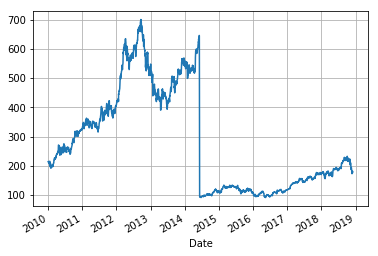

In [13]:
# We should look at the trends and movement of the stock price via some plots
# plotting the closing price using matplotlib which is imported above 
aapl['Close'].plot(grid=True)

# show the plot
plt.show()

# Financial Analysis: Calculating Returns

## Returns

In [14]:
# we'll be using the adjusted closing price column to calculate the percent change 
daily_close = aapl[['Adj_Close']]

# using pct_change method to calculate the percent change
daily_pct_c = daily_close.pct_change()

# filling the nan values with 0
daily_pct_c.fillna(0, inplace=True)

print(daily_pct_c)

            Adj_Close
Date                 
2010-01-04   0.000000
2010-01-05   0.001729
2010-01-06  -0.015906
2010-01-07  -0.001849
2010-01-08   0.006648
2010-01-11  -0.008822
2010-01-12  -0.011375
2010-01-13   0.014106
2010-01-14  -0.005792
2010-01-15  -0.016712
2010-01-19   0.044238
2010-01-20  -0.015416
2010-01-21  -0.017254
2010-01-22  -0.049608
2010-01-25   0.026928
2010-01-26   0.014108
2010-01-27   0.009440
2010-01-28  -0.041340
2010-01-29  -0.036264
2010-02-01   0.013886
2010-02-02   0.005803
2010-02-03   0.017206
2010-02-04  -0.036039
2010-02-05   0.017756
2010-02-08  -0.006856
2010-02-09   0.010664
2010-02-10  -0.005474
2010-02-11   0.018215
2010-02-12   0.008607
2010-02-16   0.015071
...               ...
2018-10-19   0.018785
2018-10-22   0.002600
2018-10-23   0.009427
2018-10-24  -0.034302
2018-10-25   0.021898
2018-10-26  -0.015924
2018-10-29  -0.018770
2018-10-30   0.004994
2018-10-31   0.026067
2018-11-01   0.015352
2018-11-02  -0.066331
2018-11-05  -0.028388
2018-11-06

In [15]:
# calculating daily log returns
import numpy as np
daily_log_returns = np.log(daily_close.pct_change()+1)

print(daily_log_returns)

            Adj_Close
Date                 
2010-01-04        NaN
2010-01-05   0.001727
2010-01-06  -0.016034
2010-01-07  -0.001850
2010-01-08   0.006626
2010-01-11  -0.008861
2010-01-12  -0.011440
2010-01-13   0.014007
2010-01-14  -0.005808
2010-01-15  -0.016853
2010-01-19   0.043288
2010-01-20  -0.015536
2010-01-21  -0.017404
2010-01-22  -0.050881
2010-01-25   0.026572
2010-01-26   0.014009
2010-01-27   0.009395
2010-01-28  -0.042219
2010-01-29  -0.036938
2010-02-01   0.013791
2010-02-02   0.005786
2010-02-03   0.017060
2010-02-04  -0.036704
2010-02-05   0.017600
2010-02-08  -0.006879
2010-02-09   0.010607
2010-02-10  -0.005489
2010-02-11   0.018051
2010-02-12   0.008570
2010-02-16   0.014959
...               ...
2018-10-19   0.018611
2018-10-22   0.002596
2018-10-23   0.009383
2018-10-24  -0.034904
2018-10-25   0.021661
2018-10-26  -0.016052
2018-10-29  -0.018949
2018-10-30   0.004982
2018-10-31   0.025733
2018-11-01   0.015236
2018-11-02  -0.068633
2018-11-05  -0.028799
2018-11-06

In [16]:
# Resample `aapl` to business months, taking last observation as value 
monthly = aapl.resample('BM').apply(lambda x: x[-1])

# Calculate the monthly percentage change
monthly.pct_change()[1:]

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,diff
Date,,,,,,,,,,,,,
2010-02-26,0.006465,0.014688,0.061761,0.065380,-0.592713,NaN,0.0,0.006465,0.014688,0.061761,0.065380,-0.592713,-1.248420
2010-03-31,0.163603,0.153239,0.160693,0.148470,-0.151344,NaN,0.0,0.163603,0.153239,0.160693,0.148470,-0.151344,-1.218750
2010-04-30,0.143615,0.143527,0.113196,0.111021,0.259611,NaN,0.0,0.143615,0.143527,0.113196,0.111021,0.259611,15.775510
2010-05-31,-0.036842,-0.041283,-0.029310,-0.016125,0.503538,NaN,0.0,-0.036842,-0.041283,-0.029310,-0.016125,0.503538,-0.694878
2010-06-30,-0.010325,-0.005513,-0.013183,-0.020827,-0.093381,NaN,0.0,-0.010325,-0.005513,-0.013183,-0.020827,-0.093381,1.065308
2010-07-30,-0.003185,0.006706,0.019559,0.022741,-0.393862,NaN,0.0,-0.003185,0.006706,0.019559,0.022741,-0.393862,-1.262066
2010-08-31,-0.054877,-0.058298,-0.057081,-0.055005,-0.061184,NaN,0.0,-0.054877,-0.058298,-0.057081,-0.055005,-0.061184,-0.079190
2010-09-30,0.194956,0.185803,0.170169,0.167215,0.600315,NaN,0.0,0.194956,0.185803,0.170169,0.167215,0.600315,-5.200000
2010-10-29,0.052699,0.054759,0.069760,0.060722,-0.360682,NaN,0.0,0.052699,0.054759,0.069760,0.060722,-0.360682,-0.380952


In [17]:
# Resample `aapl` to quarters, take the mean as value per quarter
quarter = aapl.resample("4M").mean()

# Calculate the quarterly percentage change
quarter.pct_change()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,diff
Date,,,,,,,,,,,,,
2010-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-05-31,0.104569,0.106813,0.110723,0.114759,-0.194441,NaN,0.000000,0.104569,0.106813,0.110723,0.114759,-0.194441,-1.145114
2010-09-30,0.126190,0.125508,0.128068,0.123814,-0.028014,NaN,0.000000,0.126190,0.125508,0.128068,0.123814,-0.028014,-2.112353
2011-01-31,0.219246,0.216407,0.224709,0.221632,-0.246665,NaN,0.000000,0.219246,0.216407,0.224709,0.221632,-0.246665,-2.051151
2011-05-31,0.087537,0.086790,0.086786,0.085850,-0.059310,NaN,0.000000,0.087537,0.086790,0.086786,0.085850,-0.059310,-1.778948
2011-09-30,0.064880,0.069299,0.061647,0.065699,0.260926,NaN,0.000000,0.064880,0.069299,0.061647,0.065699,0.260926,-1.198788
2012-01-31,0.089667,0.086192,0.092054,0.088861,-0.239217,NaN,0.000000,0.089667,0.086192,0.092054,0.088861,-0.239217,-6.573683
2012-05-31,0.402715,0.406082,0.398244,0.402800,0.503180,NaN,0.000000,0.402715,0.406082,0.398244,0.402800,0.503180,0.265309
2012-09-30,0.109035,0.106183,0.114094,0.110607,-0.361874,inf,0.000000,0.111206,0.108349,0.116277,0.112781,-0.361874,-2.706498


In [18]:
# Daily returns
daily_pct_c = daily_close / daily_close.shift(1) - 1

# Print `daily_pct_c`
print(daily_pct_c)

            Adj_Close
Date                 
2010-01-04        NaN
2010-01-05   0.001729
2010-01-06  -0.015906
2010-01-07  -0.001849
2010-01-08   0.006648
2010-01-11  -0.008822
2010-01-12  -0.011375
2010-01-13   0.014106
2010-01-14  -0.005792
2010-01-15  -0.016712
2010-01-19   0.044238
2010-01-20  -0.015416
2010-01-21  -0.017254
2010-01-22  -0.049608
2010-01-25   0.026928
2010-01-26   0.014108
2010-01-27   0.009440
2010-01-28  -0.041340
2010-01-29  -0.036264
2010-02-01   0.013886
2010-02-02   0.005803
2010-02-03   0.017206
2010-02-04  -0.036039
2010-02-05   0.017756
2010-02-08  -0.006856
2010-02-09   0.010664
2010-02-10  -0.005474
2010-02-11   0.018215
2010-02-12   0.008607
2010-02-16   0.015071
...               ...
2018-10-19   0.018785
2018-10-22   0.002600
2018-10-23   0.009427
2018-10-24  -0.034302
2018-10-25   0.021898
2018-10-26  -0.015924
2018-10-29  -0.018770
2018-10-30   0.004994
2018-10-31   0.026067
2018-11-01   0.015352
2018-11-02  -0.066331
2018-11-05  -0.028388
2018-11-06

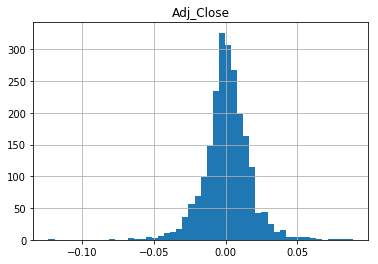

In [19]:
# Plot the distribution of `daily_pct_c`
daily_pct_c.hist(bins=50)

# Show the plot
plt.show()

In [20]:
# Calculate the cumulative daily returns
cum_daily_return = (1 + daily_pct_c).cumprod()

# Print `cum_daily_return`
print(cum_daily_return)

            Adj_Close
Date                 
2010-01-04        NaN
2010-01-05   1.001729
2010-01-06   0.985795
2010-01-07   0.983973
2010-01-08   0.990514
2010-01-11   0.981777
2010-01-12   0.970609
2010-01-13   0.984300
2010-01-14   0.978599
2010-01-15   0.962245
2010-01-19   1.004813
2010-01-20   0.989323
2010-01-21   0.972254
2010-01-22   0.924022
2010-01-25   0.948904
2010-01-26   0.962291
2010-01-27   0.971375
2010-01-28   0.931218
2010-01-29   0.897449
2010-02-01   0.909911
2010-02-02   0.915191
2010-02-03   0.930938
2010-02-04   0.897388
2010-02-05   0.913322
2010-02-08   0.907060
2010-02-09   0.916733
2010-02-10   0.911714
2010-02-11   0.928321
2010-02-12   0.936311
2010-02-16   0.950423
...               ...
2018-10-19   8.122762
2018-10-22   8.143878
2018-10-23   8.220648
2018-10-24   7.938666
2018-10-25   8.112506
2018-10-26   7.983325
2018-10-29   7.833477
2018-10-30   7.872600
2018-10-31   8.077811
2018-11-01   8.201824
2018-11-02   7.657792
2018-11-05   7.440400
2018-11-06

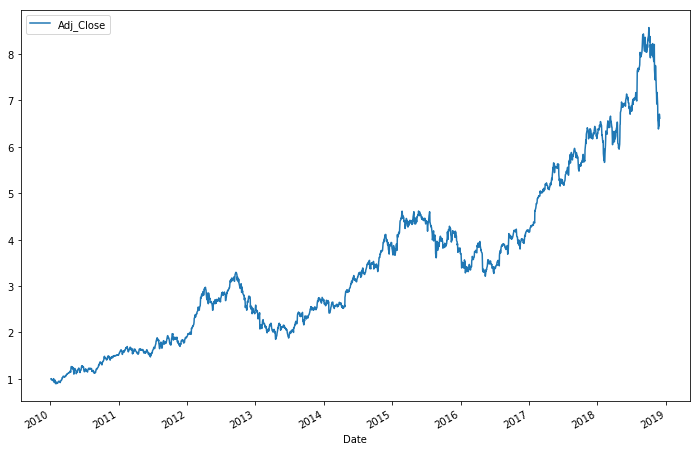

In [21]:
# Plot the cumulative daily returns
cum_daily_return.plot(figsize=(12,8))

# Show the plot
plt.show()

In [22]:
# Resample the cumulative daily return to cumulative monthly return 
cum_monthly_return = cum_daily_return.resample("M").mean()

# Print the `cum_monthly_return`
print(cum_monthly_return)


            Adj_Close
Date                 
2010-01-31   0.968955
2010-02-28   0.928905
2010-03-31   1.043926
2010-04-30   1.173537
2010-05-31   1.174997
2010-06-30   1.220251
2010-07-31   1.191297
2010-08-31   1.174353
2010-09-30   1.279618
2010-10-31   1.406169
2010-11-30   1.455950
2010-12-31   1.502201
2011-01-31   1.581142
2011-02-28   1.640964
2011-03-31   1.623713
2011-04-30   1.590651
2011-05-31   1.597050
2011-06-30   1.547037
2011-07-31   1.739349
2011-08-31   1.760491
2011-09-30   1.833995
2011-10-31   1.856128
2011-11-30   1.798118
2011-12-31   1.836037
2012-01-31   2.002607
2012-02-29   2.324989
2012-03-31   2.698508
2012-04-30   2.831657
2012-05-31   2.638535
2012-06-30   2.684743
...               ...
2016-06-30   3.433328
2016-07-31   3.502058
2016-08-31   3.843689
2016-09-30   3.960351
2016-10-31   4.133617
2016-11-30   3.953696
2016-12-31   4.105821
2017-01-31   4.293786
2017-02-28   4.816019
2017-03-31   5.071354
2017-04-30   5.153185
2017-05-31   5.504500
2017-06-30

# Moving window computation

In [23]:
# Isolate the adjusted closing prices 
adj_close_px = aapl['Adj_Close']

# Calculate the moving average - let's try it for a short period of 40 days
moving_avg = adj_close_px.rolling(window=40).mean()

# Inspect the result
print(moving_avg)

Date
2010-01-04           NaN
2010-01-05           NaN
2010-01-06           NaN
2010-01-07           NaN
2010-01-08           NaN
2010-01-11           NaN
2010-01-12           NaN
2010-01-13           NaN
2010-01-14           NaN
2010-01-15           NaN
2010-01-19           NaN
2010-01-20           NaN
2010-01-21           NaN
2010-01-22           NaN
2010-01-25           NaN
2010-01-26           NaN
2010-01-27           NaN
2010-01-28           NaN
2010-01-29           NaN
2010-02-01           NaN
2010-02-02           NaN
2010-02-03           NaN
2010-02-04           NaN
2010-02-05           NaN
2010-02-08           NaN
2010-02-09           NaN
2010-02-10           NaN
2010-02-11           NaN
2010-02-12           NaN
2010-02-16           NaN
                 ...    
2018-10-19    221.476726
2018-10-22    221.588584
2018-10-23    221.707916
2018-10-24    221.593068
2018-10-25    221.513846
2018-10-26    221.296357
2018-10-29    220.912950
2018-10-30    220.537763
2018-10-31    220.33

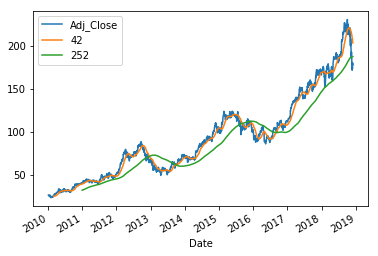

In [29]:
# Short moving window rolling mean
aapl['42'] = adj_close_px.rolling(window=40).mean()

# Long moving window rolling mean - 252 days
aapl['252'] = adj_close_px.rolling(window=252).mean()

# Plot the adjusted closing price, the short and long windows of rolling means
aapl[['Adj_Close', '42', '252']].plot()


## Volaitility Calculation

The volatility is calculated by taking a rolling window standard deviation on the percentage change in a stock. You can clearly see this in the code because you pass daily_pct_c and the min_periods to rolling_std().

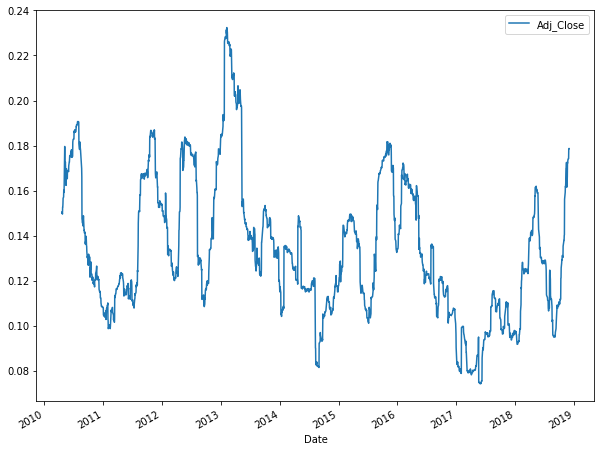

In [30]:
# Define the minumum of periods to consider 
min_periods = 75 

# Calculate the volatility
vol = daily_pct_c.rolling(min_periods).std() * np.sqrt(min_periods) 

# Plot the volatility
vol.plot(figsize=(10, 8))

# Show the plot
plt.show()

# Building the strategy

In [31]:
# let's add the returns column in the aapl  dataframe
aapl['returns'] = np.log(aapl['Adj_Close'] / aapl['Adj_Close'].shift(1))
aapl.head()

,Open,High,Low,Close,Volume,Dividend,Split,Adj_Open,Adj_High,Adj_Low,Adj_Close,Adj_Volume,diff,42,252,returns
Date,,,,,,,,,,,,,,,,
2010-01-04,213.43,214.50,212.38,214.01,17633200.0,0.0,1.0,26.926265,27.061256,26.793797,26.999437,123432400.0,-0.58,NaN,NaN,NaN
2010-01-05,214.60,215.59,213.25,214.38,21496600.0,0.0,1.0,27.073872,27.198770,26.903556,27.046116,150476200.0,0.22,NaN,NaN,0.001727
2010-01-06,214.38,215.23,210.75,210.97,19720000.0,0.0,1.0,27.046116,27.153352,26.588157,26.615912,138040000.0,3.41,NaN,NaN,-0.016034
2010-01-07,211.75,212.00,209.05,210.58,17040400.0,0.0,1.0,26.714316,26.745856,26.373685,26.566710,119282800.0,1.17,NaN,NaN,-0.001850
2010-01-08,210.30,212.00,209.06,211.98,15986100.0,0.0,1.0,26.531385,26.745856,26.374947,26.743333,111902700.0,-1.68,NaN,NaN,0.006626



## Formalizing the momentum strategy

We'll go step by step:
1. First define your two different lookback periods: a short window(30) and a long window(120). Assign these integers to 2 variables. Make sure that the integer that you assign to the short window is shorter than the integer that you assign to the long window variable!

2. Next, make an empty signals DataFrame, but do make sure to copy the index of your aapl data so that you can start calculating the daily buy or sell signal for your aapl data.

3. Create a column in your empty signals DataFrame that is named signal and initialize it by setting the value for all rows in this column to 0.0.

4. Now that preparatory work is done, it’s time to create the set of short and long simple moving averages over the respective long and short time windows. Make use of the `rolling()` function to start your rolling window calculcations: within the function, specify the window and the min_period, and set the center argument. In practice, this will result in a `rolling()` function to which you have passed either short_window or long_window, 1 as the minimum number of observations in the window that are required to have a value, and `False`, so that the labels are not set at the center of the window. Next, don’t forget to also chain the `mean()` function so that you calculate the rolling mean.

5. Once you have calculated the mean average of the short and long windows, you should create a signal when the short moving average crosses the long moving average, but only for the period greater than the shortest moving average window. In Python, this will result in a condition: **signals['short_mavg'][short_window:] > signals['long_mavg'][short_window:]**. Note that you add the [short_window:] to comply with the condition “only for the period greater than the shortest moving average window”. When the condition is true, the initialized value 0.0 in the signal column will be overwitten with 1.0. A “signal” is created! If the condition is false, the original value of 0.0 will be kept and no signal is generated. You use the NumPy where() function to set up this condition. Much the same like you read just now, the variable to which you assign this result is `signals['signal'][short_window]`, because you only want to create signals for the period greater than the shortest moving average window!

6. Lastly, you take the difference of the signals in order to generate actual trading orders. In other words, in this column of your signals DataFrame, you’ll be able to distinguish between long and short positions, whether you’re buying or selling stock.


**Strategy rules:**

The dual moving average crossover occurs when a short-term average crosses a long-term average. 
This signal is used to identify that momentum is shifting in the direction of the short-term average. A buy signal is generated when the short-term average crosses the long-term average and rises above it, while a sell signal is triggered by a short-term average crossing long-term average and falling below it.



In [32]:
# Initialize the short and long windows
short_window = 50
long_window = 120

# Initialize the `signals` DataFrame with the `signal` column
signals = pd.DataFrame(index=aapl.index)
signals['signal'] = 0.0

# Create short simple moving average over the short window
signals['short_mavg'] = aapl['Close'].rolling(window=short_window, min_periods=1, center=False).mean()

# Create long simple moving average over the long window
signals['long_mavg'] = aapl['Close'].rolling(window=long_window, min_periods=1, center=False).mean()

# Create signals
signals['signal'][short_window:] = np.where(signals['short_mavg'][short_window:] 
                                            > signals['long_mavg'][short_window:], 1.0, 0.0)   

# Creating trading orders
signals['positions'] = signals['signal'].diff()
signals

,signal,short_mavg,long_mavg,positions
Date,,,,
2010-01-04,0.0,214.010000,214.010000,NaN
2010-01-05,0.0,214.195000,214.195000,0.0
2010-01-06,0.0,213.120000,213.120000,0.0
2010-01-07,0.0,212.485000,212.485000,0.0
2010-01-08,0.0,212.384000,212.384000,0.0
2010-01-11,0.0,212.005000,212.005000,0.0
2010-01-12,0.0,211.392857,211.392857,0.0
2010-01-13,0.0,211.300000,211.300000,0.0
2010-01-14,0.0,211.092222,211.092222,0.0


# Plot the above generated signals

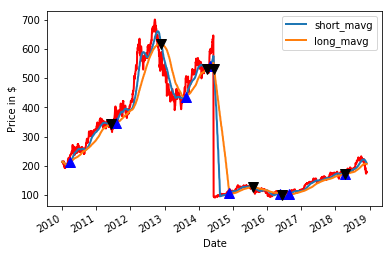

In [33]:
# Initialize the plot figure
fig = plt.figure()

# Add a subplot and label for y-axis
ax1 = fig.add_subplot(111,  ylabel='Price in $')

# Plot the closing price
aapl['Close'].plot(ax=ax1, color='r', lw=2.)

# Plot the short and long moving averages
signals[['short_mavg', 'long_mavg']].plot(ax=ax1, lw=2.)

# Plot the buy signals
ax1.plot(signals.loc[signals.positions == 1.0].index, 
         signals.short_mavg[signals.positions == 1.0],
         '^', markersize=10, color='b')
         
# Plot the sell signals
ax1.plot(signals.loc[signals.positions == -1.0].index, 
         signals.short_mavg[signals.positions == -1.0],
         'v', markersize=10, color='k')
         
# Show the plot

# Backtest the strategy

In [39]:
# Set the initial capital
initial_capital= float(100000.0)

# Create a DataFrame `positions`
positions = pd.DataFrame(index=signals.index).fillna(0.0)

# Buy a 100 shares
positions['AAPL'] = 100*signals['signal']   
  
# Initialize the portfolio with value owned   
portfolio = positions.multiply(aapl['Adj_Close'], axis=0)

# Store the difference in shares owned 
pos_diff = positions.diff()

# Add `holdings` to portfolio
portfolio['holdings'] = (positions.multiply(aapl['Adj_Close'], axis=0)).sum(axis=1)

# Add `cash` to portfolio
portfolio['cash'] = initial_capital - (pos_diff.multiply(aapl['Adj_Close'], axis=0)).sum(axis=1).cumsum()   

# Add `total` to portfolio
portfolio['total'] = portfolio['cash'] + portfolio['holdings']

# Add `returns` to portfolio
portfolio['returns'] = portfolio['total'].pct_change()
portfolio.tail()


,AAPL,holdings,cash,total,returns
Date,,,,,
2018-11-26,17462.0,17462.0,94761.700649,112223.700649,0.002081
2018-11-27,17424.0,17424.0,94761.700649,112185.700649,-0.000339
2018-11-28,18094.0,18094.0,94761.700649,112855.700649,0.005972
2018-11-29,17955.0,17955.0,94761.700649,112716.700649,-0.001232
2018-11-30,17858.0,17858.0,94761.700649,112619.700649,-0.000861


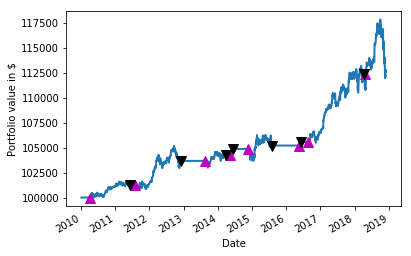

In [35]:
fig = plt.figure()

ax1 = fig.add_subplot(111, ylabel='Portfolio value in $')

# Plot the equity curve in dollars
portfolio['total'].plot(ax=ax1, lw=2.)

# Plot the "buy" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == 1.0].index, 
         portfolio.total[signals.positions == 1.0],
         '^', markersize=10, color='m')

# Plot the "sell" trades against the equity curve
ax1.plot(portfolio.loc[signals.positions == -1.0].index, 
         portfolio.total[signals.positions == -1.0],
         'v', markersize=10, color='k')

# Show the plot
plt.show()

## Calculating the sharpe ratio for moving crossover strategy

In [36]:
# Sharpe Ratio
# Isolate the returns of your strategy
returns = portfolio['returns']

# annualized Sharpe ratio
sharpe_ratio = np.sqrt(252) * (returns.mean() / returns.std())

# Print the Sharpe ratio
print(sharpe_ratio)

0.6655052205303486


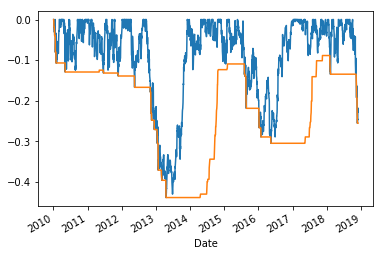

In [37]:
# Define a trailing 252 trading day window
window = 252

# Calculate the max drawdown in the past window days for each day
rolling_max = aapl['Adj_Close'].rolling(window, min_periods=1).max()
daily_drawdown = aapl['Adj_Close']/rolling_max - 1.0

# Calculate the minimum (negative) daily drawdown
max_daily_drawdown = daily_drawdown.rolling(window, min_periods=1).min()

# Plot the results
daily_drawdown.plot()
max_daily_drawdown.plot()

# Show the plot
plt.show()

## Compound Annual Growth Rate

In [38]:
# Get the number of days in `aapl`
days = (aapl.index[-1] - aapl.index[0]).days

# Calculate the CAGR 
cagr = ((((aapl['Adj_Close'][-1]) / aapl['Adj_Close'][1])) ** (365.0/days)) - 1

# Print CAGR
print(cagr)

0.23596203500039792
